
## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



/tmp/ipykernel_223585/350218231.py:279: UserWarning: frames=<generator object animate at 0x7faac91335b0> which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  anim = FuncAnimation(fig, lambda artists: artists, frames=animate())


/mnt/c/Users/micha/downloads/ok/KBYX20170910_120107_V06
Sweep finished
Sweep finished
Sweep finished
Sweep finished
Sweep finished
Sweep finished
/mnt/c/Users/micha/downloads/ok/KBYX20170910_120656_V06
Sweep finished
Sweep finished
Sweep finished
Sweep finished
Sweep finished
Sweep finished
/mnt/c/Users/micha/downloads/ok/KBYX20170910_121245_V06
Sweep finished
Sweep finished
Sweep finished
Sweep finished
Sweep finished
Sweep finished


<Figure size 1400x800 with 0 Axes>

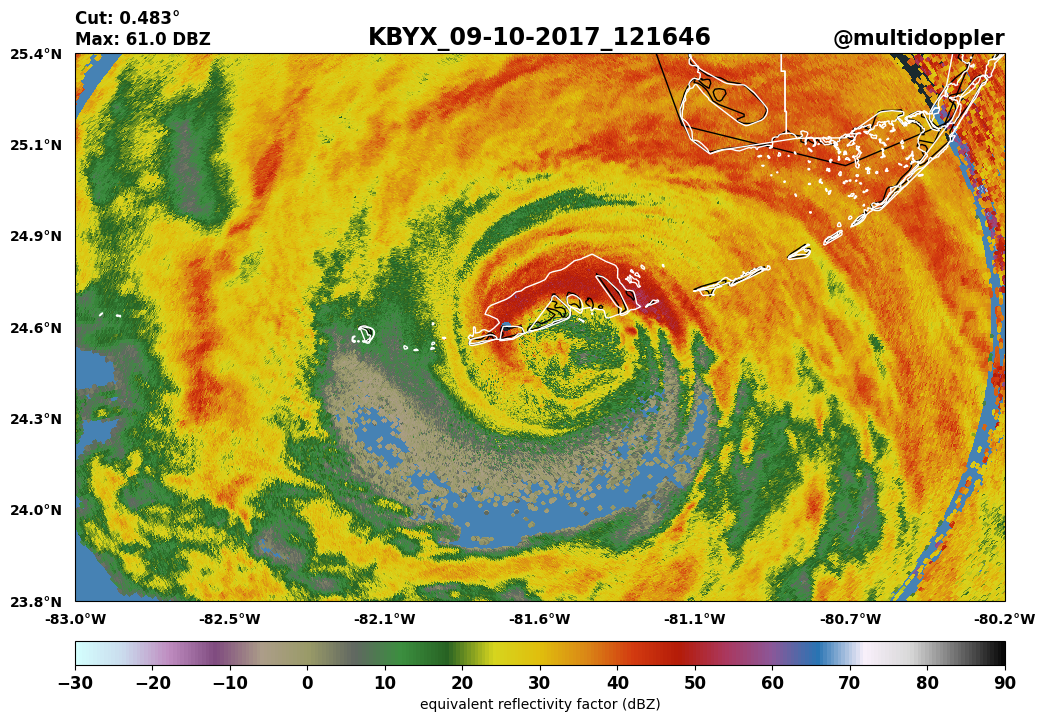

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.animation import FuncAnimation
import pyart, glob
from scipy import constants
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
import matplotlib.colors as colors
import matplotlib.colors as mcolors
import pandas as pd
from matplotlib.offsetbox import AnnotationBbox, TextArea
from matplotlib.patches import Rectangle 
from matplotlib.transforms import Bbox
cdict = {'red':   [[0.0,     0.020, 0.020],
                   [0.1875,  0.039, 0.039],
                   [0.3438,  0.110, 0.078],
                   [0.3672,  0.110, 0.110],
                   [0.375,   0.471, 0.471],
                   [0.3828,  0.0,   0.0],
                   [0.4375,  0.392, 1.0],
                   [0.4688,  0.855, 0.855],
                   [0.5313,  0.502, 0.502],
                   [0.5625,  0.882, 0.882],
                   [0.6094,  0.471, 0.471],
                   [0.6875,  0.353, 0.353],
                   [1.0,     0.961, 0.961]],
         
         'green': [[0.0,     0.118, 0.118],
                   [0.1875,  0.251, 0.251],
                   [0.3438,  0.706, 0.706],
                   [0.3672,  0.902, 0.902],
                   [0.375,   0.471, 0.471],
                   [0.3828,  0.0,   0.0],
                   [0.4375,  0.863, 1.0],
                   [0.4688,  0.471, 0.471],
                   [0.5313,  0.0,   0.0],
                   [0.5625,  0.345, 0.345],
                   [0.6094,  0.0,   0.0],
                   [0.6875,  0.0,   0.0],
                   [1.0,     0.961, 0.961]],
         
         'blue':  [[0.0,     0.357, 0.357],
                   [0.1875,  0.251, 0.251],
                   [0.3438,  0.706, 0.706],
                   [0.3672,  0.902, 0.902],
                   [0.375,   0.471, 0.471],
                   [0.3828,  0.596, 0.596],
                   [0.4375,  1.0,   0.376],
                   [0.4688,  0.0,   0.0],
                   [0.5313,  0.0,   0.0],
                   [0.5625,  0.882, 0.882],
                   [0.6094,  0.471, 0.471],
                   [0.6875,  0.353, 0.353],
                   [1.0,     0.784, 0.784]]}
zdr_cmap = colors.LinearSegmentedColormap('testCmap', segmentdata=cdict, N=256)

cdict = {'red':   [[0.0,  0.0, 0.0],
                   [0.5,  0.0, 0.0],
                   [0.85,  1.0, 1.0],
                   [1.0,  0.9, 0.9]],
         'green': [[0.0,  0.0, 0.0],
                   [0.25, 0.0, 0.0],
                   [0.5,  0.0, 0.0],
                   [0.85,  1.0, 1.0],
                   [1.0,  0.0, 0.0]],
         'blue':  [[0.0,  1.0, 1.0],
                   [0.5,  1.0, 1.0],
                   [1.0,  0.1, 0.1]]}
cc_cmap = colors.LinearSegmentedColormap('testCmap', segmentdata=cdict, N=256)

## pick and choose RGB hexcodes to make a custom colormap (this one below is NWS Norman's colortable/the WDSS_II table ##

hex_colors = ['#080808', '#6F6F6F', '#D8D8D8', '#F9F0FB', '#2974B3', '#8C5798', '#AB375D', '#B41B08', '#D33B10', '#DA8716', '#E0BE0D', '#D6D51E', '#276223', '#3B8F3F', '#606761', '#9A9B68', '#AC9D89', '#7F4B7F', '#BF8CC0', '#CADBED', '#D4FFFE']
rgb_colors = [mcolors.hex2color(hex_code) for hex_code in hex_colors]

reversed_rgb_colors = rgb_colors[::-1]

custom_colormap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", reversed_rgb_colors)


plt.rcParams['text.color'] = 'black'
plt.rcParams['figure.facecolor'] = 'white' #212121 
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.rcParams["figure.figsize"] = (12, 8)
plt.rcParams['font.family'] = 'sans-serif'

reader1 = shpreader.Reader("/mnt/c/Users/micha/Desktop/tl_2022_us_primaryroads/tl_2022_us_primaryroads.shp")
reader2 = shpreader.Reader("/mnt/c/users/micha/desktop/GPK.SHP.cb_2013_us_county_500k_wgs84/cb_2013_us_county_500k_wgs84.shp")
reader3 = shpreader.Reader("/mnt/c/users/micha/desktop/borders/InternationalBorders.shp")
reader4 = shpreader.Reader("/mnt/c/users/micha/desktop/lakes/ne_10m_lakes.shp")
interstates = list(reader1.geometries())
INTERSTATES = cfeature.ShapelyFeature(interstates, ccrs.PlateCarree())


counties = list(reader2.geometries())
COUNTIES = cfeature.ShapelyFeature(counties, ccrs.PlateCarree())

borders = list(reader3.geometries())
BORDERS = cfeature.ShapelyFeature(borders, ccrs.PlateCarree())

lakes = list(reader4.geometries())
LAKES = cfeature.ShapelyFeature(lakes, ccrs.PlateCarree())









fig = plt.figure(figsize=(14, 8))

def plot_radar(radar, display, sweep_idx):
    plt.clf()

    z_sweep = sweep_idx
    v_sweep = sweep_idx + 1
    name = radar.metadata['instrument_name']
    angle = radar.fixed_angle['data'][0]
    
    sweep = 0

    ts = pyart.graph.common.generate_radar_time_sweep(radar, z_sweep).strftime('%m-%d-%Y_%H%M%S') 
    
    slice_indices = radar.get_slice(sweep)

    #vcp = radar.metadata['vcp_pattern']
    
    file_path = '/mnt/c/users/micha/desktop/places/us-cities-top-1k.csv'
    cities_df = pd.read_csv(file_path)
    




    dx = 1
    dy = 1
    rda_lon = radar.longitude['data'][0]
    rda_lat = radar.latitude['data'][0]
    xmin = rda_lon - dx + 0.25
    xmax = rda_lon + dx - 0.25
    ymin = rda_lat - dy + 0.25
    ymax = rda_lat + dy - 0.25
    deg_sign = u'\N{DEGREE SIGN}'
    tilt_angle = radar.fixed_angle['data'][sweep_idx]
    max_ref = radar.fields['reflectivity']['data'][slice_indices].max()
    ax = plt.axes(projection=ccrs.PlateCarree())
    pos = ax.get_position()



    #extent = [-97.97, -95.41, 35.90, 36.90]  
    
    #filtered_cities_df = cities_df[
     #  (cities_df['lon'] >= extent[0]) & 
      # (cities_df['lon'] <= extent[1]) & 
       #(cities_df['lat'] >= extent[2]) & 
       #(cities_df['lat'] <= extent[3])]

   # latitudes = filtered_cities_df['lat']
   # longitudes = filtered_cities_df['lon']
    #names = filtered_cities_df['City']

    display.plot_ppi_map('reflectivity', z_sweep,
                 vmin=-30, vmax=90, 
                 colorbar_label='Z, [dBz]', 
                 cmap=custom_colormap,
                 title=None,
                 ax=ax, colorbar_flag=False, lat_lines=[0], lon_lines=[0], lat_0=rda_lat, lon_0=rda_lon, filter_transitions=False)
                 
                 
                 


    # Set limits
    x=plt.xlim(-83.00, -80.20)
    y=plt.ylim(23.77, 25.42)
    lon_min, lon_max=(x)
    lat_min, lat_max=(y)
    lon_ticks = np.linspace(lon_min, lon_max, 7)
    lat_ticks = np.linspace(lat_min, lat_max, 7)
    ax.set_xticks(lon_ticks, crs=ccrs.PlateCarree())
    ax.set_yticks(lat_ticks, crs=ccrs.PlateCarree())
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda v, p: f'{v:.1f}°W'))
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda v, p: f'{v:.1f}°N'))
    
    ax.tick_params(axis='both', which='major', labelsize=10, pad=5, color='white')
    for label in ax.xaxis.get_ticklabels():
        label.set_fontweight('bold')
        label.set_color('black')
    for label in ax.yaxis.get_ticklabels():
        label.set_fontweight('bold')
        label.set_color('black')
    
    #for latitude, longitude, name in zip(latitudes, longitudes, names):
     #  plt.plot(longitude, latitude, marker='o', color='red', markersize=5, transform=ccrs.PlateCarree())
      # plt.text(longitude + 0.1, latitude + 0.1, name, fontsize=9, fontweight='bold', transform=ccrs.PlateCarree())
      
      
      



    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(INTERSTATES, facecolor='none', edgecolor='white')
    ax.add_feature(COUNTIES, facecolor='none', edgecolor='white') 
    ax.add_feature(BORDERS, facecolor='none', edgecolor='white')
    ax.add_feature(LAKES, facecolor='none', edgecolor='white', zorder=1)

    cax = fig.add_axes([ax.get_position().x0, ax.get_position().y0 - 0.08, ax.get_position().width, 0.03])
    display.plot_colorbar(mappable=None, field=None, label=None, orient='horizontal', cax=cax, ax=ax, fig=None, ticks=[-30, -20, -10, 0, 10, 20, 30, 40, 50, 60, 70, 80, 90], ticklabs=None)
    #display.plot_point(radar.longitude['data'][0], radar.latitude['data'][0],color='k',label_text=name, symbol='*', markersize=10)
    
    ax.set_title(f'{name}_{ts}', fontsize=17, loc='center', fontweight='bold', color='black') 
    ax.set_title('@multidoppler', loc='right', fontweight='bold', fontsize=15, color='black')
    ax.set_title(f'Cut: {tilt_angle:.3f}°\nMax: {max_ref} DBZ', fontweight='bold', fontsize=12, loc='left', color='black') #f'Cut: {tilt_angle:.3f}°\nMax: {max_ref} DBZ'
    resol = '10m'
    land = cfeature.NaturalEarthFeature('physical', 'land', scale=resol, facecolor=cfeature.COLORS['land'])
    ax.add_feature(land, facecolor='#1B292E', zorder=0) #2B332F
    ax.add_feature(cfeature.OCEAN, facecolor='#4682B4')
    
    #title_box = Rectangle((pos.x0, pos.y1 + 0.01), pos.width, 0.055, fill=True, facecolor='#212121', edgecolor='#000000', transform=fig.transFigure, alpha=0.8, zorder=3)
    
    plt.xticks(fontsize=12, fontweight='bold', color='black')
    plt.yticks(fontsize=12, fontweight='bold', color='black')
     
    print('Sweep finished')



    #fig.add_artist(title_box)

    
    
    #fig.text(pos.x0 + 0.01, pos.y1 + 0.05, '@multidoppler', 
     #        horizontalalignment='left', verticalalignment='center', 
      #       fontsize=12, fontweight='bold', color='#E7F6F2')
    #fig.text(pos.x0 + 0.01, pos.y1 + 0.02, f'Radar: {name}', 
       #      horizontalalignment='left', verticalalignment='center', 
        #     fontsize=10, color='#E7F6F2')
    #fig.text(pos.x1 - 0.01, pos.y1 + 0.05, f'Tilt Angle: {elev_angle:.2f}°',
     #        horizontalalignment='right', verticalalignment='center',
      #       fontsize=12, fontweight='bold', color='#E7F6F2')
    #gdf.plot()



def animate():
    frame = 0
    files = glob.glob('/mnt/c/Users/micha/downloads/ok/*_V06') 
    for file in files:
        radar = pyart.io.read_nexrad_archive(file)
        
        print(file)

        elev = radar.fixed_angle['data'][:]
        sweep_idx = np.where(np.logical_and(elev >= elev_min, elev <= elev_max))[0]
        display = pyart.graph.RadarMapDisplay(radar)

        for sweep in sweep_idx:
            plot_radar(radar, display, sweep)

            if frame < 1:
                frame += 1

            yield

        del radar, display

elev_min = 0.3 # min elevation you want to plot, max elevation below. 
elev_max = 0.6

fig = plt.figure()
anim = FuncAnimation(fig, lambda artists: artists, frames=animate())
anim.save('animation.mp4', writer='ffmpeg', fps=10, dpi=144)